In [1]:
import pandas as pd

Data Path

In [2]:
path_data = "D:/SPA/timeseries/fpt_stock_price.xlsx"
df = pd.read_excel(path_data)

Data

In [3]:
df

,Ngày,Giá đóng cửa,Positive,Neutral,Negative
0,2006-12-13,"11,338",0,0,0
1,2006-12-14,"11,905",0,0,0
2,2006-12-15,"12,500",0,0,0
3,2006-12-18,"13,124",0,0,0
4,2006-12-19,"13,776",0,0,0
...,...,...,...,...,...
4621,2025-07-04,"122,500",2,1,0
4622,2025-07-07,"123,800",8,4,0
4623,2025-07-08,"124,500",2,2,1
4624,2025-07-09,"122,800",1,0,1


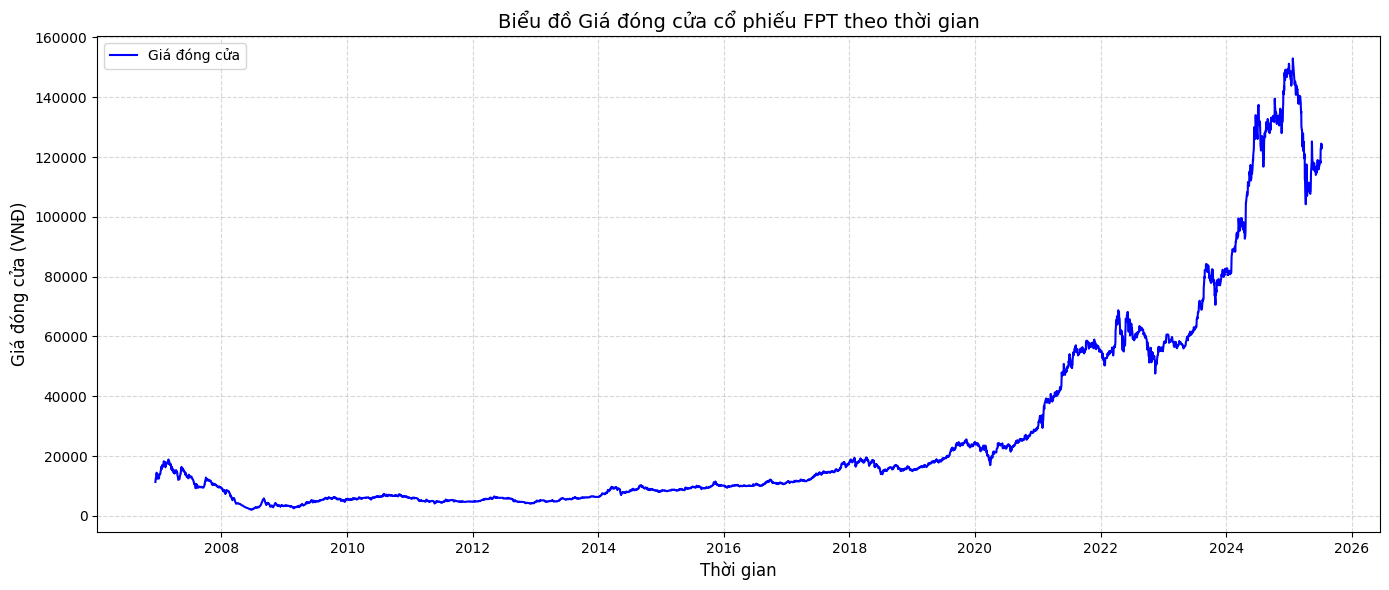

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Đảm bảo cột ngày đúng kiểu datetime
df['Ngày'] = pd.to_datetime(df['Ngày'])

# Chuyển 'Giá đóng cửa' về số (nếu đang là chuỗi có dấu phẩy)
df['Giá đóng cửa'] = df['Giá đóng cửa'].astype(str).str.replace(',', '').astype(float)

# Tạo biểu đồ chuẩn
plt.figure(figsize=(14, 6))
plt.plot(df['Ngày'], df['Giá đóng cửa'], label='Giá đóng cửa', linewidth=1.5, color='blue')

# Tùy chỉnh biểu đồ đẹp hơn
plt.title('Biểu đồ Giá đóng cửa cổ phiếu FPT theo thời gian', fontsize=14)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Giá đóng cửa (VNĐ)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Trả về nền trắng
plt.style.use('default')
plt.tight_layout()
plt.show()


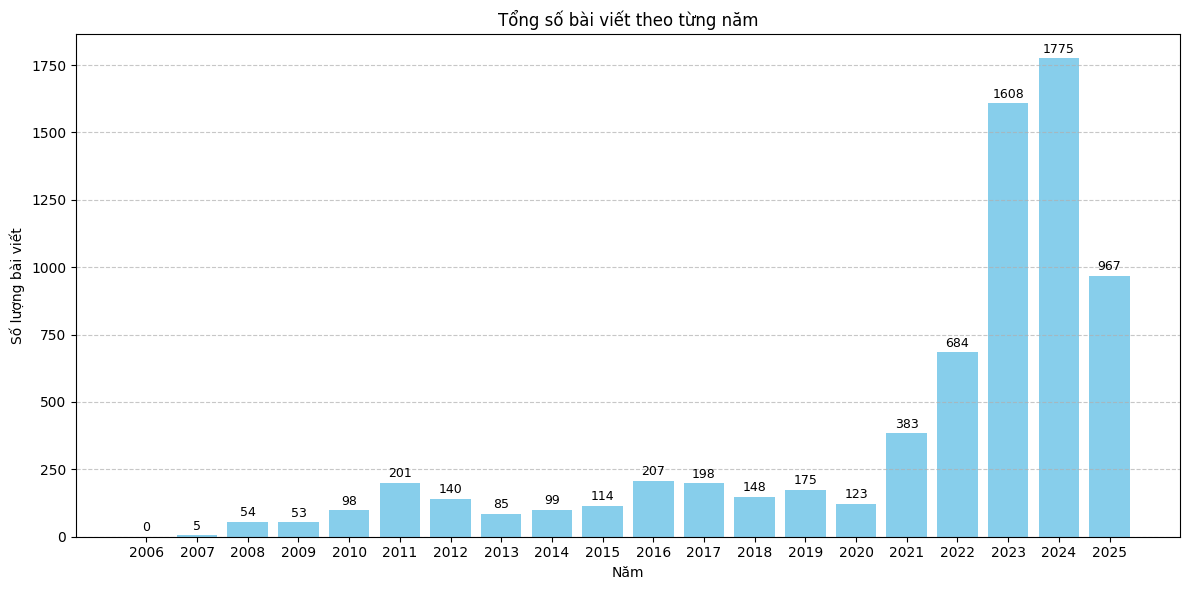

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển ngày & tạo các cột nếu chưa có
df['Ngày'] = pd.to_datetime(df['Ngày'])
df['Tổng_bài_viết'] = df[['Positive', 'Neutral', 'Negative']].sum(axis=1)
df['Năm'] = df['Ngày'].dt.year

# Nhóm theo năm
bieu_do = df.groupby('Năm')['Tổng_bài_viết'].sum()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
bars = plt.bar(bieu_do.index.astype(str), bieu_do.values, color='skyblue')

# Thêm số phía trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

# Trang trí biểu đồ
plt.title('Tổng số bài viết theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng bài viết')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


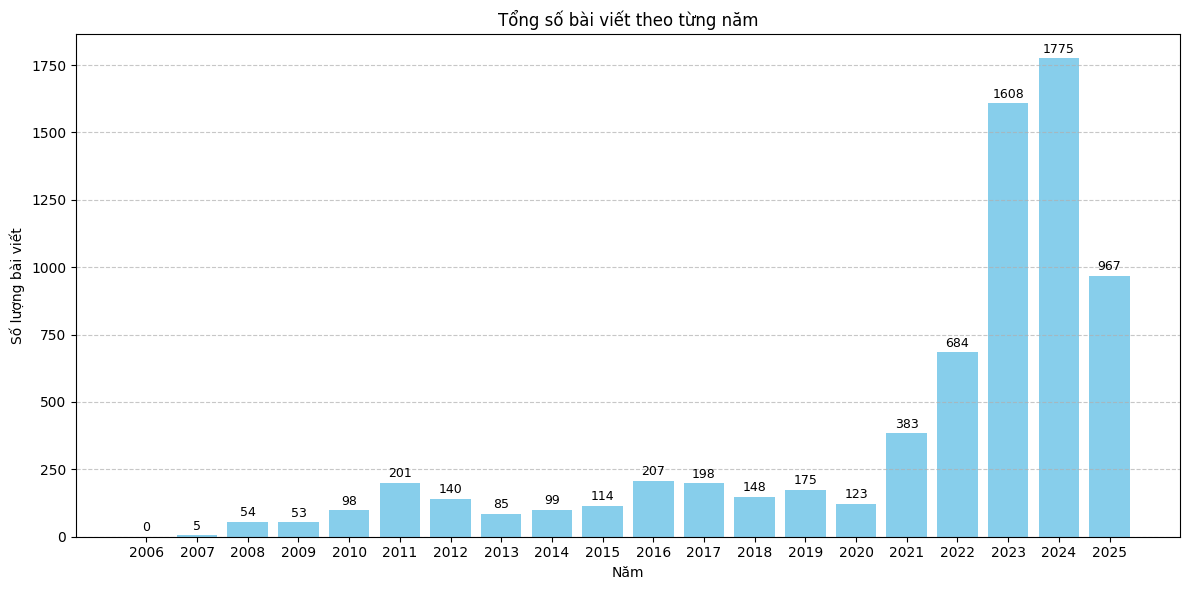

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển ngày & tạo các cột nếu chưa có
df['Ngày'] = pd.to_datetime(df['Ngày'])
df['Tổng_bài_viết'] = df[['Positive', 'Neutral', 'Negative']].sum(axis=1)
df['Năm'] = df['Ngày'].dt.year

# Nhóm theo năm
bieu_do = df.groupby('Năm')['Tổng_bài_viết'].sum()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
bars = plt.bar(bieu_do.index.astype(str), bieu_do.values, color='skyblue')

# Thêm số phía trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

# Trang trí biểu đồ
plt.title('Tổng số bài viết theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng bài viết')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
#---------------------------------------------------------------------------------------------------
# Đảm bảo cột Ngày là datetime
df['Ngày'] = pd.to_datetime(df['Ngày'])

# Chỉ giữ lại dữ liệu từ năm 2010 trở đi
df = df[df['Ngày'].dt.year >= 2010]

C:\Users\LENOVO LEGION\AppData\Local\Temp\ipykernel_29168\2427790819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ngày'] = pd.to_datetime(df['Ngày'])
C:\Users\LENOVO LEGION\AppData\Local\Temp\ipykernel_29168\2427790819.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Năm'] = df['Ngày'].dt.year


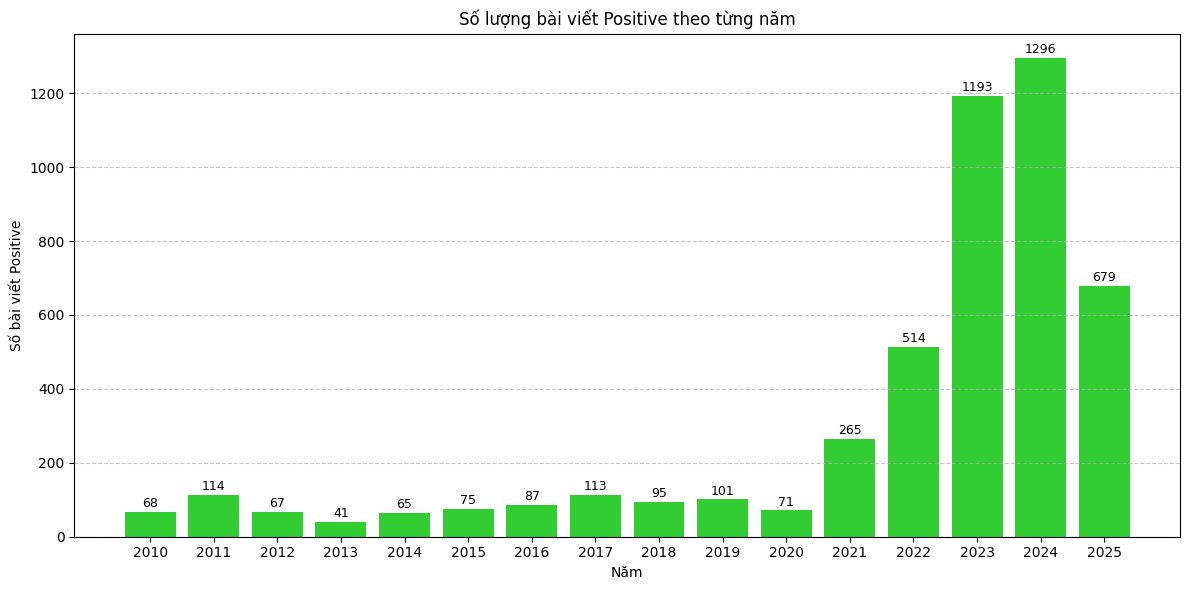

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Đảm bảo ngày đúng định dạng
df['Ngày'] = pd.to_datetime(df['Ngày'])

# Trích xuất năm
df['Năm'] = df['Ngày'].dt.year

# Nhóm theo năm và tính tổng Positive
bieu_do_pos = df.groupby('Năm')['Positive'].sum()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
bars = plt.bar(bieu_do_pos.index.astype(str), bieu_do_pos.values, color='limegreen')

# Thêm số phía trên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

# Trang trí biểu đồ
plt.title('Số lượng bài viết Positive theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Số bài viết Positive')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


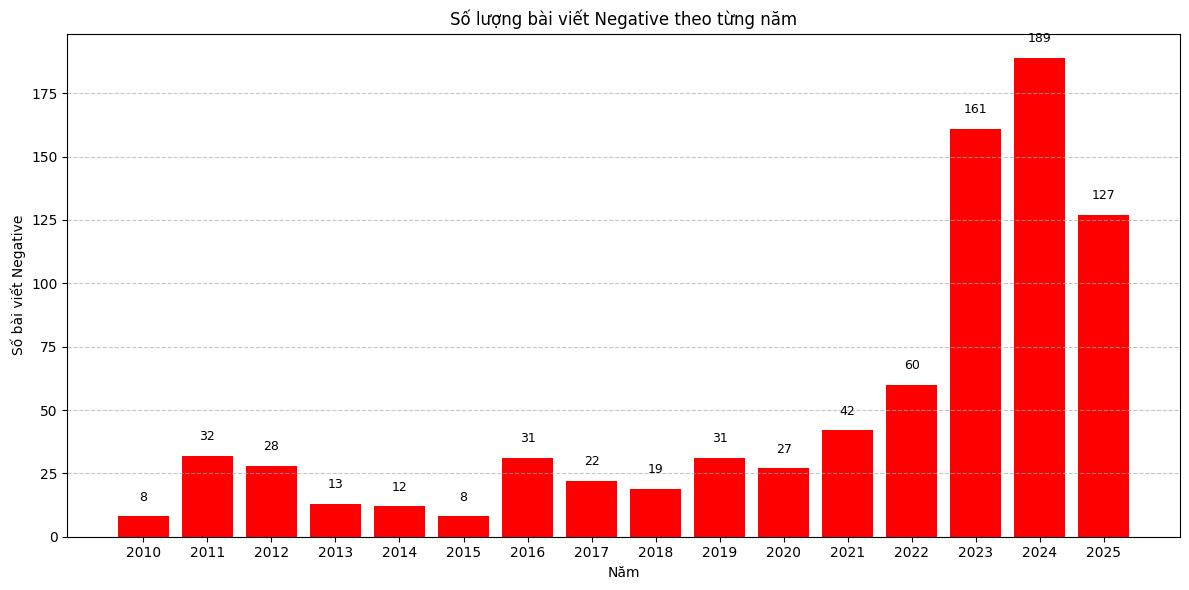

In [9]:
# Thống kê số bài viết Negative theo năm
bieu_do_neg = df.groupby('Năm')['Negative'].sum()

plt.figure(figsize=(12, 6))
bars = plt.bar(bieu_do_neg.index.astype(str), bieu_do_neg.values, color='red')

# Hiển thị số trên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.title('Số lượng bài viết Negative theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Số bài viết Negative')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


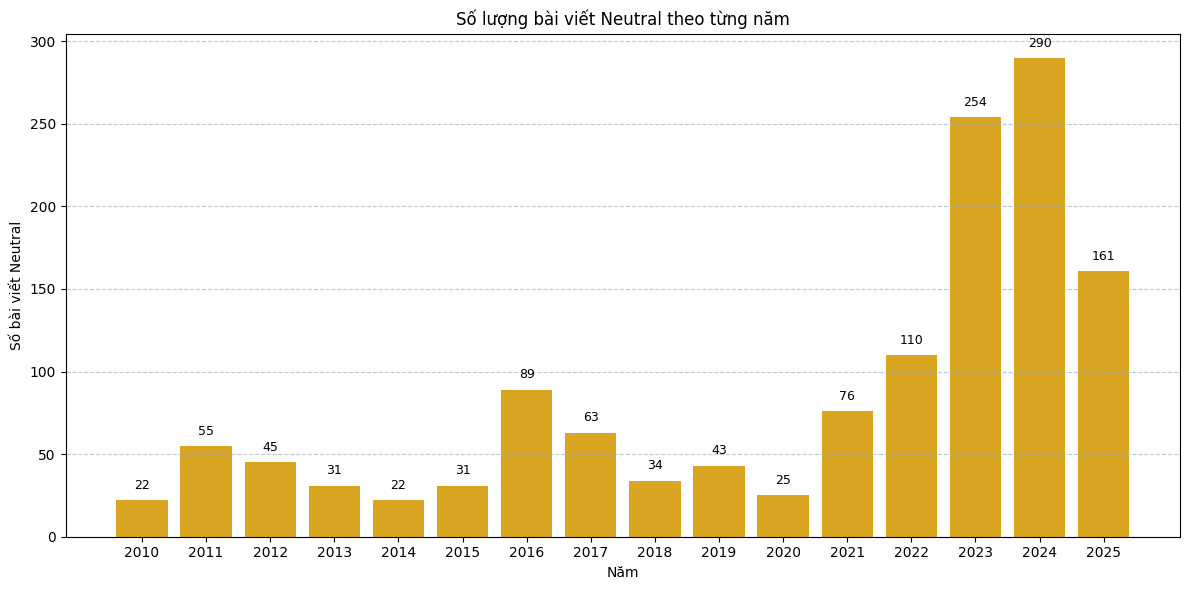

In [10]:
# Thống kê số bài viết Neutral theo năm
bieu_do_neu = df.groupby('Năm')['Neutral'].sum()

plt.figure(figsize=(12, 6))
bars = plt.bar(bieu_do_neu.index.astype(str), bieu_do_neu.values, color='goldenrod')

# Hiển thị số trên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.title('Số lượng bài viết Neutral theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Số bài viết Neutral')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
df[["Giá đóng cửa","Positive","Neutral","Negative"]]

,Giá đóng cửa,Positive,Neutral,Negative
757,5763.0,1,0,0
758,5763.0,0,0,0
759,5658.0,0,0,0
760,5623.0,0,0,0
761,5448.0,0,0,0
...,...,...,...,...
4621,122500.0,2,1,0
4622,123800.0,8,4,0
4623,124500.0,2,2,1
4624,122800.0,1,0,1


**--------------------------------------------------------------------------------**

In [12]:
# Đặt số lượng ngày muốn "ẩn" để mô phỏng dữ liệu bị thiếu cuối chuỗi
#====================================================
number_missing = 10
window_size = 7
#====================================================
model_name = "LSTM_missing10_window7.keras"
name_log="LSTM_missing10_window7.log"
#====================================================
# Phân chia chuỗi thời gian thành:
data_visible = df[:-number_missing]     # Dùng để train
data_hidden  = df[-number_missing:]     # Dùng để kiểm tra mô hình sau huấn luyện

# Chọn feature
features = ['Giá đóng cửa', 'Positive', 'Neutral', 'Negative']

C:\Users\LENOVO LEGION\AppData\Local\Temp\ipykernel_29168\938080027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ngày'] = pd.to_datetime(df['Ngày'])
C:\Users\LENOVO LEGION\AppData\Local\Temp\ipykernel_29168\938080027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_visible['Ngày'] = pd.to_datetime(data_visible['Ngày'])
C:\Users\LENOVO LEGION\AppData\Local\Temp\ipykernel_29168\938080027.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

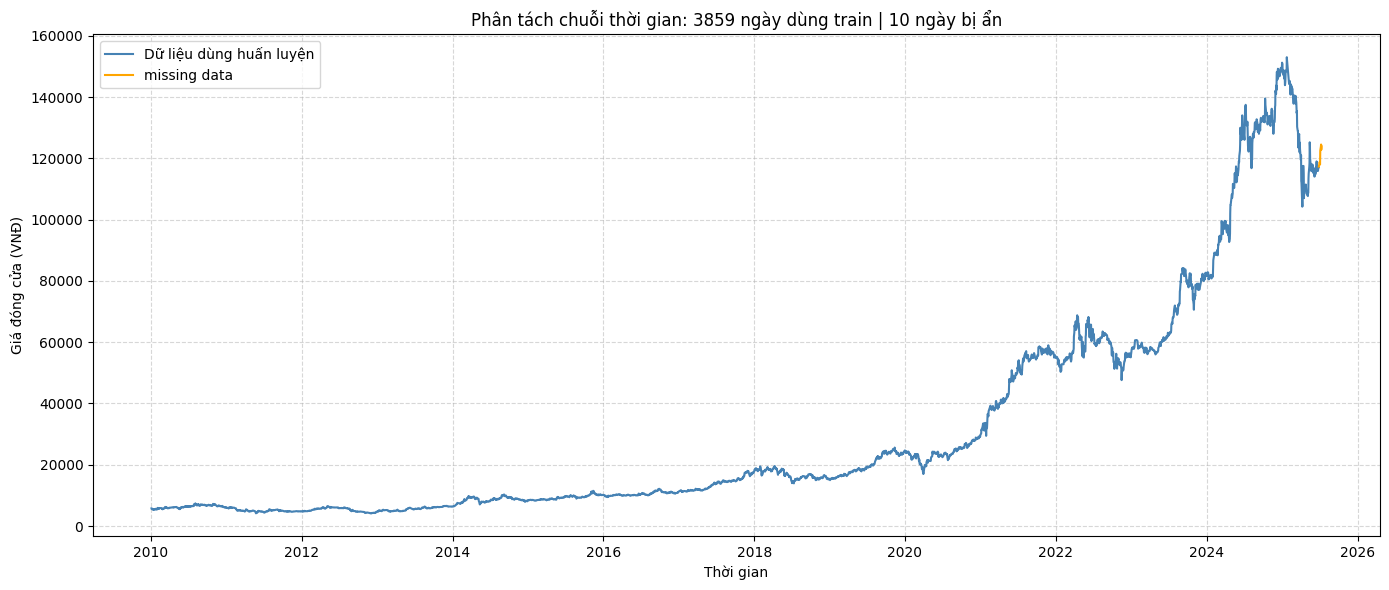

In [13]:
import matplotlib.pyplot as plt

# Đảm bảo cột ngày có định dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'])
data_visible['Ngày'] = pd.to_datetime(data_visible['Ngày'])
data_hidden['Ngày'] = pd.to_datetime(data_hidden['Ngày'])

plt.figure(figsize=(14, 6))

# Phần dữ liệu dùng để train
plt.plot(data_visible['Ngày'], data_visible['Giá đóng cửa'], label='Dữ liệu dùng huấn luyện', color='steelblue')

# Phần dữ liệu bị ẩn (để dự đoán)
plt.plot(data_hidden['Ngày'], data_hidden['Giá đóng cửa'], label='missing data', color='orange')

# Tuỳ chỉnh biểu đồ
plt.title(f'Phân tách chuỗi thời gian: {len(data_visible)} ngày dùng train | {len(data_hidden)} ngày bị ẩn')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
visible_scaled = scaler.fit_transform(data_visible[features])

# Hàm tạo sliding window
def create_sliding_window(data, window_size=7):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i][0])  # Giá đóng cửa là feature đầu tiên
    return np.array(X), np.array(y)

X_train, y_train = create_sliding_window(visible_scaled, window_size=window_size)
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')


X_train shape: (3852, 7, 4), y_train shape: (3852,)


In [15]:
import os
import sys
import random
import numpy as np
import tensorflow as tf
from keras.callbacks import Callback
import logging



def set_seed(seed=34):
    os.environ['PYTHONHASHSEED'] = str(seed)  # Đảm bảo hash map Python không ngẫu nhiên
    random.seed(seed)                         # Ngẫu nhiên Python
    np.random.seed(seed)                      # Ngẫu nhiên NumPy
    tf.random.set_seed(seed)                  # Ngẫu nhiên TensorFlow

    # Bắt buộc dùng cho tính tái lập chặt chẽ (CPU-based)
    tf.keras.utils.set_random_seed(seed)
    tf.config.experimental.enable_op_determinism()


# Cấu hình logging (chỉ ghi file, không ảnh hưởng console)
logging.basicConfig(
    filename=name_log,
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

from time import time

class TrainingLogger(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start = time()
    def on_epoch_end(self, epoch, logs=None):
        epoch_time = time() - self.epoch_start
        loss = logs.get('loss', None)
        log_str = f"Epoch {epoch+1}/{self.params['epochs']} - {epoch_time:.1f}s - Train Loss: {loss:.6f}"
        logging.info(log_str)


In [16]:
#--------------------------------------------------------------------------------------------------------------------------------
import logging
from datetime import datetime

dataset_name = path_data
train_samples = len(data_visible)
test_samples = len(data_hidden)
hyperparams = {
    "lr": 0.001,
    "batch_size": 8,
    "optimizer": "Adam",
    "epochs": 20,
    "seed": 34,
    "window_size": window_size
}
logging.info(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}] Starting training...")
logging.info(f"Model: {model_name}")
logging.info(f"Dataset: {dataset_name} (Train={train_samples}, Test={test_samples})")
logging.info(f"Hyperparams: {hyperparams}")

In [17]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.models import Sequential #đầu vào
from keras.layers import LSTM,GRU #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense , BatchNormalization #đầu ra
from keras.optimizers import Adam

set_seed(34)

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(64))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Dự đoán giá đóng cửa

# Compile mô hình
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

# EarlyStopping callback
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

#ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='loss',
    factor=0.5,       # giảm LR còn 50%
    patience=5,       # sau 5 epoch không cải thiện sẽ giảm LR
    min_lr=1e-6,      # LR nhỏ nhất
    verbose=1
)

# Tóm tắt mô hình
model.summary()

c:\Users\Public\anaconda3\envs\kltn\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 128)         │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 7, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,225 (422.75 KB)

 Trainable params: 107,841 (421.25 KB)

 Non-trainable params: 384 (1.50 KB)

In [18]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=8,
    callbacks=[early_stop, reduce_lr, TrainingLogger()],
    verbose=1   
)

Epoch 1/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3124 - learning_rate: 0.0010
Epoch 2/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0508 - learning_rate: 0.0010
Epoch 3/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0306 - learning_rate: 0.0010
Epoch 4/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0168 - learning_rate: 0.0010
Epoch 5/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0113 - learning_rate: 0.0010
Epoch 6/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0079 - learning_rate: 0.0010
Epoch 7/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0061 - learning_rate: 0.0010
Epoch 8/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0067 - learning_rate: 0.0010
Epoch 9/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0063 - learning_rate: 0.0010
Epoch 10/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0064 - learning_rate: 0.0010
Epoch 11/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0061 - learning_rate: 0.00

In [19]:
model.save(model_name)

In [20]:
# Tạo input ban đầu:
last_window = visible_scaled[-window_size:].tolist()
predictions_scaled = []

for _ in range(number_missing):
    x_input = np.array([last_window]) 
    pred = model.predict(x_input, verbose=0)[0][0]  # giá đóng cửa (đã scale)

    # Ghép kết quả dự đoán với 3 feature cũ (giữ nguyên Positive/Neutral/Negative là 0)
    next_input = [pred, 0, 0, 0]  # vì không có tin tức thật cho tương lai

    last_window.append(next_input)
    last_window.pop(0)

    predictions_scaled.append([pred, 0, 0,0])  # giữ định dạng 4 chiều để inverse

# Biến predictions_scaled thành array để inverse
pred_array_scaled = np.array(predictions_scaled)

# Khôi phục về đơn vị gốc (VNĐ)
predicted_prices = scaler.inverse_transform(pred_array_scaled)[:, 0]  # chỉ lấy giá đóng cửa


In [21]:
# Giá thực tế từ phần bị ẩn
true_prices = data_hidden['Giá đóng cửa'].values
dates_hidden = data_hidden['Ngày'].values


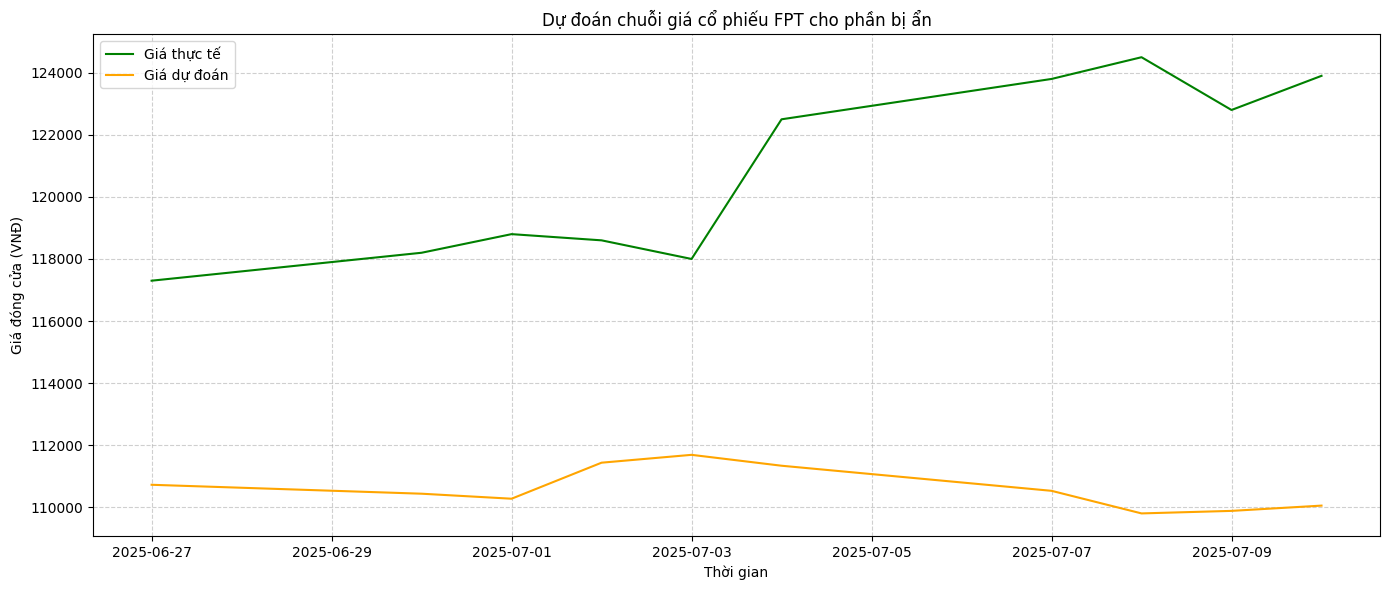

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(dates_hidden, true_prices, label='Giá thực tế', color='green')
plt.plot(dates_hidden, predicted_prices, label='Giá dự đoán', color='orange', linestyle='-')
plt.title('Dự đoán chuỗi giá cổ phiếu FPT cho phần bị ẩn')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


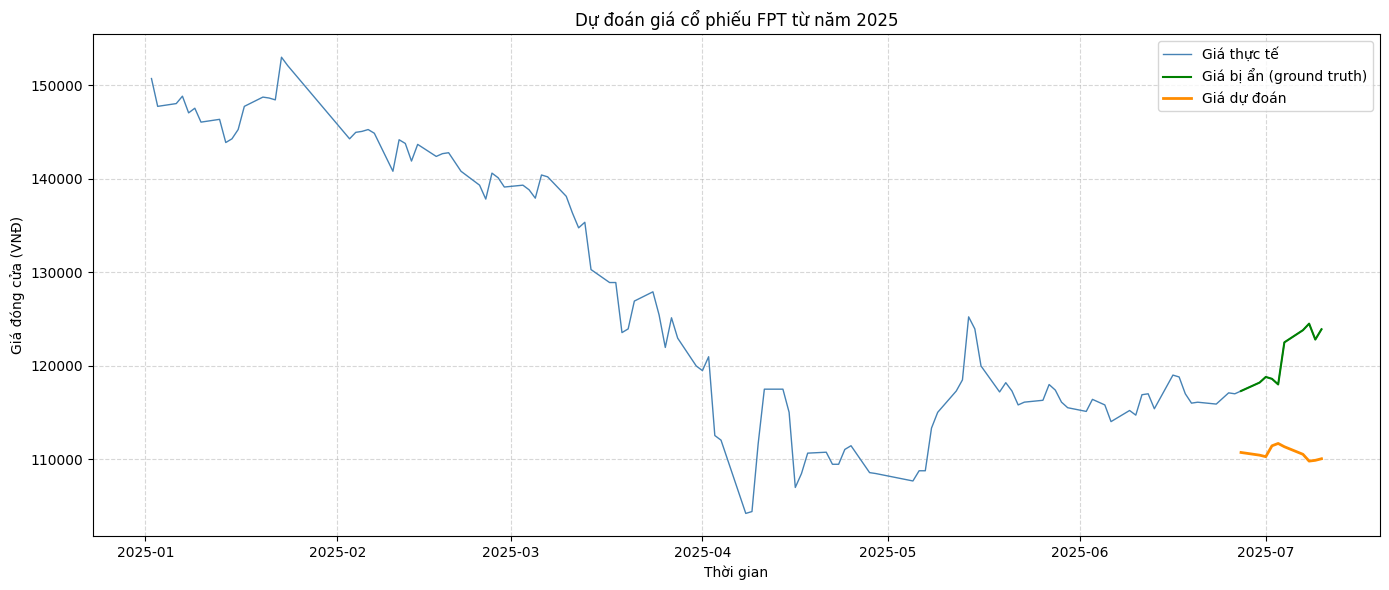

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Tạo dữ liệu đầy đủ
dates_all = pd.concat([data_visible['Ngày'], data_hidden['Ngày']])
prices_all = np.concatenate([data_visible['Giá đóng cửa'].values, data_hidden['Giá đóng cửa'].values])

# Giá dự đoán
dates_predicted = data_hidden['Ngày']
prices_predicted = predicted_prices

# Lọc từ 2025 trở đi
mask_2025_all = dates_all.dt.year >= 2025
mask_2025_pred = dates_predicted.dt.year >= 2025

dates_all_2025 = dates_all[mask_2025_all]
prices_all_2025 = prices_all[mask_2025_all]

dates_pred_2025 = dates_predicted[mask_2025_pred]
prices_pred_2025 = prices_predicted[-len(dates_pred_2025):]

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))

plt.plot(dates_all_2025, prices_all_2025, label='Giá thực tế', color='steelblue', linewidth=1)
plt.plot(dates_pred_2025, data_hidden[mask_2025_pred]['Giá đóng cửa'], label='Giá bị ẩn (ground truth)', color='green', linestyle='-')
plt.plot(dates_pred_2025, prices_pred_2025, label='Giá dự đoán', color='darkorange', linestyle='-', linewidth=2)

plt.title('Dự đoán giá cổ phiếu FPT từ năm 2025')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(true_prices, predicted_prices, scaler, data_hidden, number_missing):
    # ==== 1. Tính metric trên dữ liệu gốc (VNĐ) ====
    mae = mean_absolute_error(true_prices, predicted_prices)
    rmse = np.sqrt(mean_squared_error(true_prices, predicted_prices))
    r2 = r2_score(true_prices, predicted_prices)
    nmae = mae / np.mean(true_prices)
    similarity = 1 - nmae
    fb = (np.sum(predicted_prices) - np.sum(true_prices)) / np.sum(true_prices)
    fa2 = np.mean((predicted_prices / true_prices >= 0.5) & (predicted_prices / true_prices <= 2))

    df_raw = pd.DataFrame([{
        "Dataset": path_data,
        "Missing": number_missing,
        "Similarity": round(similarity, 2),
        "NMAE": round(nmae, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 2),
        "FB": round(fb, 2),
        "FA2": round(fa2, 2),
        "Type": "Raw (VNĐ)"
    }])

    # ==== 2. Tính metric trên dữ liệu đã MinMaxScaler ====
    # Scale true_prices và predicted_prices
    true_scaled = scaler.transform(data_hidden[['Giá đóng cửa','Positive','Neutral','Negative']])[:, 0]
    pred_scaled = scaler.transform(
        np.column_stack([predicted_prices, np.zeros((len(predicted_prices), 3))])
    )[:, 0]

    mae_s = mean_absolute_error(true_scaled, pred_scaled)
    rmse_s = np.sqrt(mean_squared_error(true_scaled, pred_scaled))
    r2_s = r2_score(true_scaled, pred_scaled)
    nmae_s = mae_s  # dữ liệu đã scale, NMAE = MAE
    similarity_s = 1 - nmae_s
    fb_s = (np.sum(pred_scaled) - np.sum(true_scaled)) / np.sum(true_scaled)
    fa2_s = np.mean((pred_scaled / true_scaled >= 0.5) & (pred_scaled / true_scaled <= 2))

    df_scaled = pd.DataFrame([{
        "Dataset": "FPT-scaled",
        "Missing": number_missing,
        "Similarity": round(similarity_s, 2),
        "NMAE": round(nmae_s, 2),
        "RMSE": round(rmse_s, 2),
        "R2": round(r2_s, 2),
        "FB": round(fb_s, 2),
        "FA2": round(fa2_s, 2),
        "Type": "Scaled [0,1]"
    }])

    return pd.concat([df_raw, df_scaled], ignore_index=True)

# 📌 Cách dùng:
result_df = evaluate_model(true_prices, predicted_prices, scaler, data_hidden, number_missing)
print(result_df.to_markdown(index=False))


| Dataset                                |   Missing |   Similarity |   NMAE |     RMSE |     R2 |    FB |   FA2 | Type         |
|:---------------------------------------|----------:|-------------:|-------:|---------:|-------:|------:|------:|:-------------|
| D:/SPA/timeseries/fpt_stock_price.xlsx |        10 |         0.92 |   0.08 | 10689.1  | -14.26 | -0.08 |     1 | Raw (VNĐ)    |
| FPT-scaled                             |        10 |         0.93 |   0.07 |     0.07 | -14.26 | -0.09 |     1 | Scaled [0,1] |


c:\Users\Public\anaconda3\envs\kltn\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [25]:
from datetime import datetime

best_epoch = int(np.argmin(history.history['loss'])) + 1
best_loss = float(np.min(history.history['loss']))
logging.info(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}] Training completed!")
logging.info(f"Best Epoch: {best_epoch} (Train Loss={best_loss:.6f})")
logging.info(f"Model saved at: {model_name}")
logging.info(f"Final Metrics on Test Set → {result_df.to_dict(orient='records')}")